#LIBRARY & Initial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
%matplotlib inline

In [ ]:
np.random.seed(123)   # Seed for random number generator
x = np.random.randint(2, size = 500)   # Binary information as stream of bits (binary signal 0 or 1)
n = len(x)          # Number of bits
Tb = 50;         # Bit period (second)
nb = 50;           # Number of samples per bit
br = 1/Tb;          # Bit rate  (Hz) (maximum frequency)
f = 2*br            # Carrier frequency (Hz) (>= 2*br) (sample frequency)

t = Tb*np.arange(0,n,1/nb)

#PSK Modulation

**Generate and plot the carrier signal**

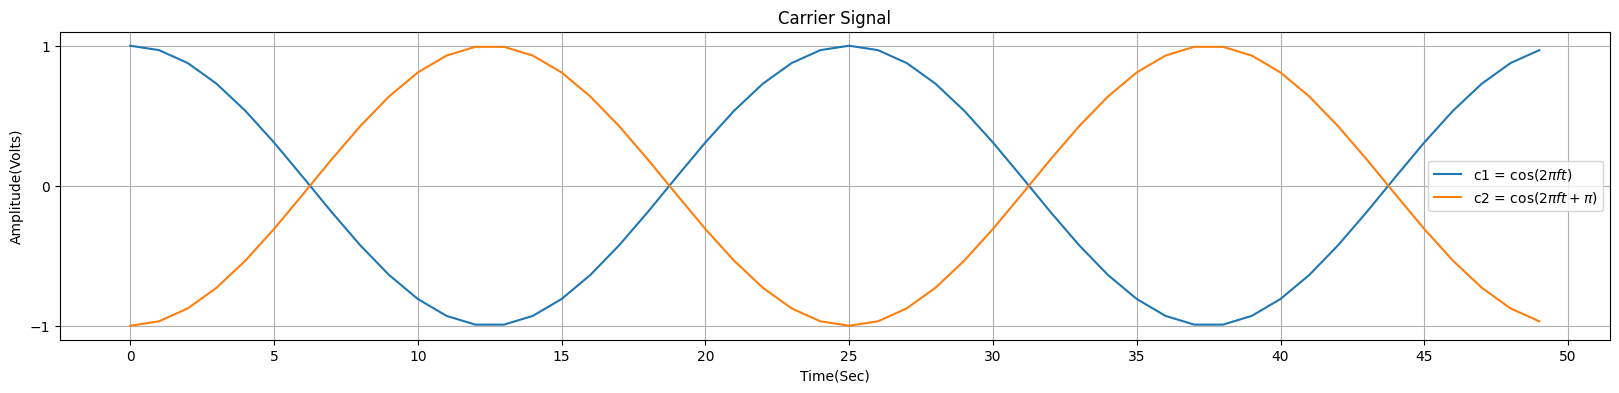

In [ ]:

# plot the carrier signal for 1 bit period
plt.figure(figsize=(20,4))
t_  = Tb*np.arange(0,1,1/nb)
plt.plot(t_,np.cos(2*np.pi*f*t_))
plt.plot(t_,np.cos(2*np.pi*f*t_ + np.pi))
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude(Volts)')
plt.xticks(np.arange(0,Tb+Tb/10,Tb/10))
plt.yticks([-1,0,1])
plt.grid(True)
plt.title('Carrier Signal')
plt.legend(['c1 = $\cos(2\pi ft$)','c2 = $\cos(2\pi ft + \pi)$'])
plt.savefig("carrier_psk.png")
plt.show()

*biểu diễn với chuỗi bit 1001 cho report*

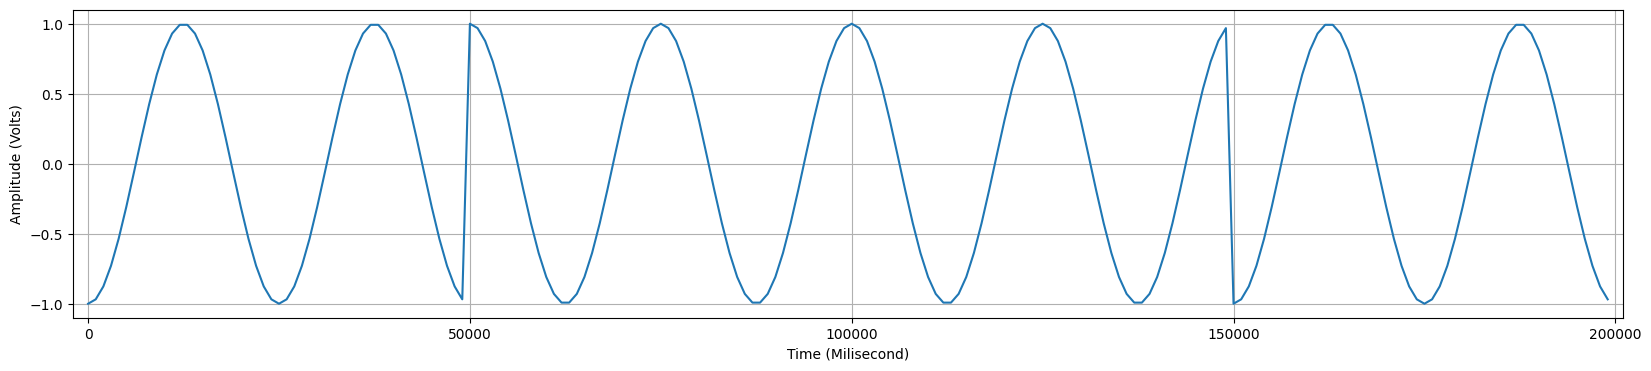

In [ ]:
x_1001 = np.array([1,0,0,1])
t_1001 = Tb*np.arange(0,len(x_1001),1/nb)

c1_1001 = np.cos(2*np.pi*f*t_1001)            # carrier signal for binary value '0'
c2_1001 = np.cos(2*np.pi*f*t_1001 + np.pi)     # carrier signal for binary value '1'

# generate the binary data sequence
digit_1001 = np.empty(shape=0, dtype=int)
for i in range(0,len(x_1001),1):
    if x_1001[i] == 1:
        digit_1001 =np.append(digit_1001,np.ones(nb))
    else:
        digit_1001 =np.append(digit_1001,np.zeros(nb))

# perform PSK modulation
mod_1001 = np.where(digit_1001==0, c1_1001, c2_1001)
# plot the PSK modulated signal
plt.figure(figsize=(20,4))
plt.plot(1000*t_1001,mod_1001)
plt.xlabel('Time (Milisecond)')
plt.ylabel('Amplitude (Volts)')
plt.xticks(1000*np.arange(0,Tb*len(t_1001)+Tb,Tb))
plt.yticks(np.arange(-1,1.5,0.5))
plt.grid(True)
# plt.title('Modulated Signal')
plt.margins(x=0.01, y=0.05)
plt.savefig("PSK_1001.png")
plt.show()

**Generate and plot the binary data sequence**

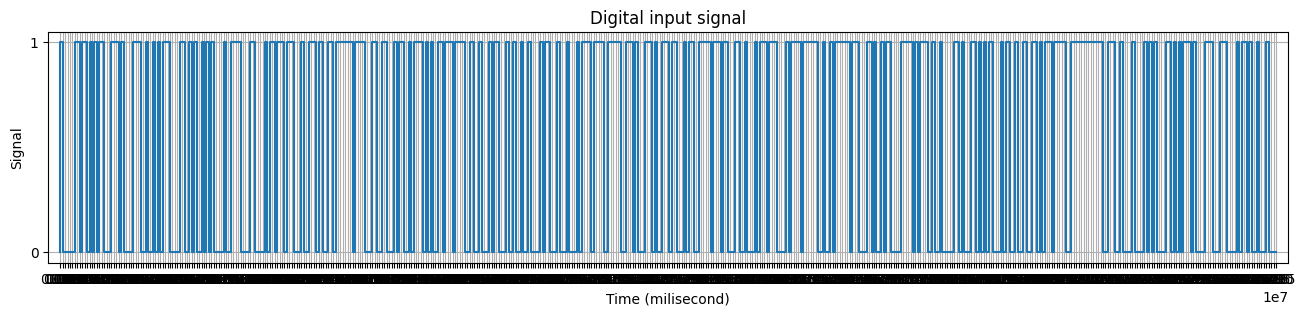

In [ ]:

# plot the binary data signal
plt.figure(figsize = (16, 3))
plt.title('Digital input signal')
plt.xlabel('Time (milisecond)')
plt.ylabel('Signal')

plt.xticks(1000*np.arange(0,Tb * n,Tb))
plt.yticks([0,1])

plt.step(1000*np.arange(0,Tb*n,Tb), x)
plt.grid(True)
plt.margins(x=0.01, y=0.05)
plt.savefig("digital_signal_psk_500bit.png")
plt.show()

**Perform PSK modulation and plot the PSK modulated signal**

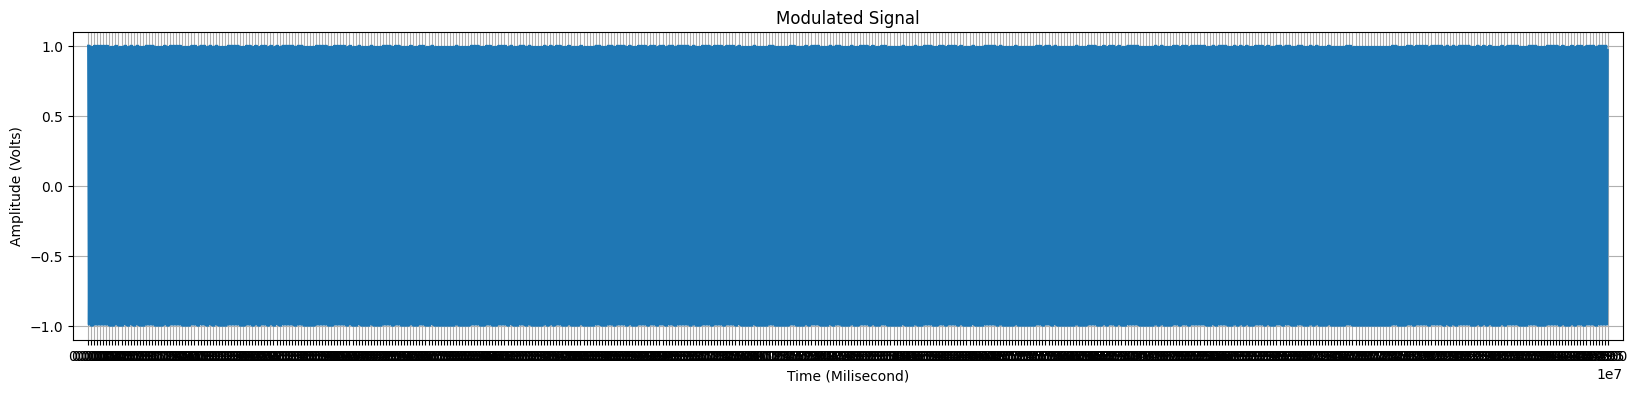

In [ ]:
# define and generate the carrier signal
c1 = np.cos(2*np.pi*f*t)            # carrier signal for binary value '0'
c2 = np.cos(2*np.pi*f*t + np.pi)     # carrier signal for binary value '1'

# generate the binary data sequence
digit = np.empty(shape=0, dtype=int)
for i in range(0,n,1):
    if x[i] == 1:
        digit =np.append(digit,np.ones(nb))
    else:
        digit =np.append(digit,np.zeros(nb))

# perform PSK modulation
mod = np.where(digit==0, c1, c2)
# plot the PSK modulated signal
plt.figure(figsize=(20,4))
plt.plot(1000*t,mod)
plt.xlabel('Time (Milisecond)')
plt.ylabel('Amplitude (Volts)')
plt.xticks(1000*np.arange(0,Tb*n+Tb,Tb))
plt.yticks(np.arange(-1,1.5,0.5))
plt.grid(True)
plt.title('Modulated Signal')
plt.margins(x=0.01, y=0.05)
plt.savefig("modulated_signal_psk.png")
plt.show()

#PSK Demodulation

**Demodulated binary data**

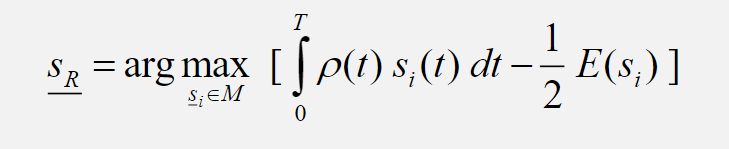

In [ ]:
# function to demodulate the signal
def demodulate(mod):
    demod=np.empty(shape=n, dtype=int)
    for i in range(0, n*nb, nb):
        I1 = np.trapz(mod[i:i+nb]*c1[i:i+nb])
        e1 = np.trapz(c1[i:i+nb]**2,t[i:i+nb])
        I2 = np.trapz(mod[i:i+nb]*c2[i:i+nb])
        e2 = np.trapz(c2[i:i+nb]**2,t[i:i+nb])
        if I1 - 1/2*e1 > I2 - 1/2*e2:
            demod[np.floor(i/nb).astype('int')] = 0
        else:
            demod[np.floor(i/nb).astype('int')] = 1
    return demod

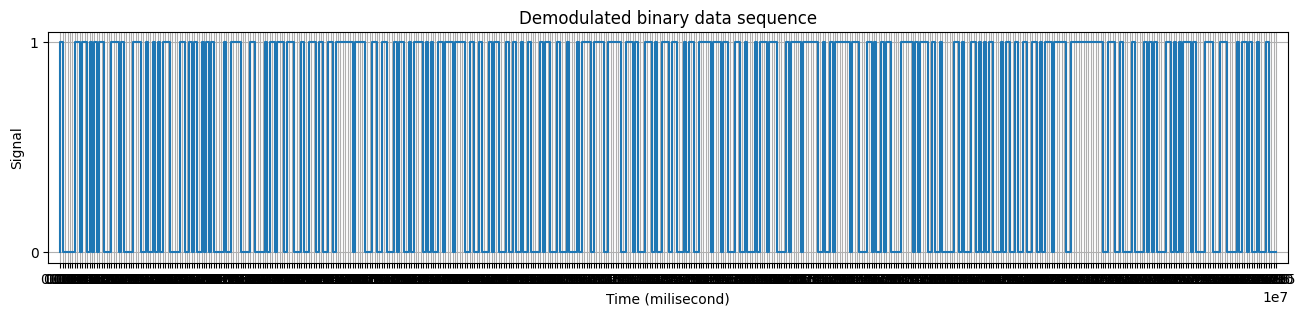

In [ ]:
# demodulate the signal
demod = demodulate(mod)

# plot the demodulated binary data sequence
plt.figure(figsize = (16, 3))
plt.title('Demodulated binary data sequence')
plt.xticks(1000*np.arange(0,Tb*n,Tb))
plt.xlabel('Time (milisecond)')
plt.ylabel('Signal')
plt.yticks([0,1])
plt.step(1000*np.arange(0,Tb*n,Tb), demod)
plt.margins(x=0.01, y=0.05)
plt.grid(True)
plt.savefig("demodulated_psk")

# PSK modulation/demodulation under the effects of Gaussian noise

**PSK Demodulation with AWGN**

In [ ]:
def add_awgn(mod, std):
    noise = np.random.normal(0, std, len(mod))
    return mod + noise

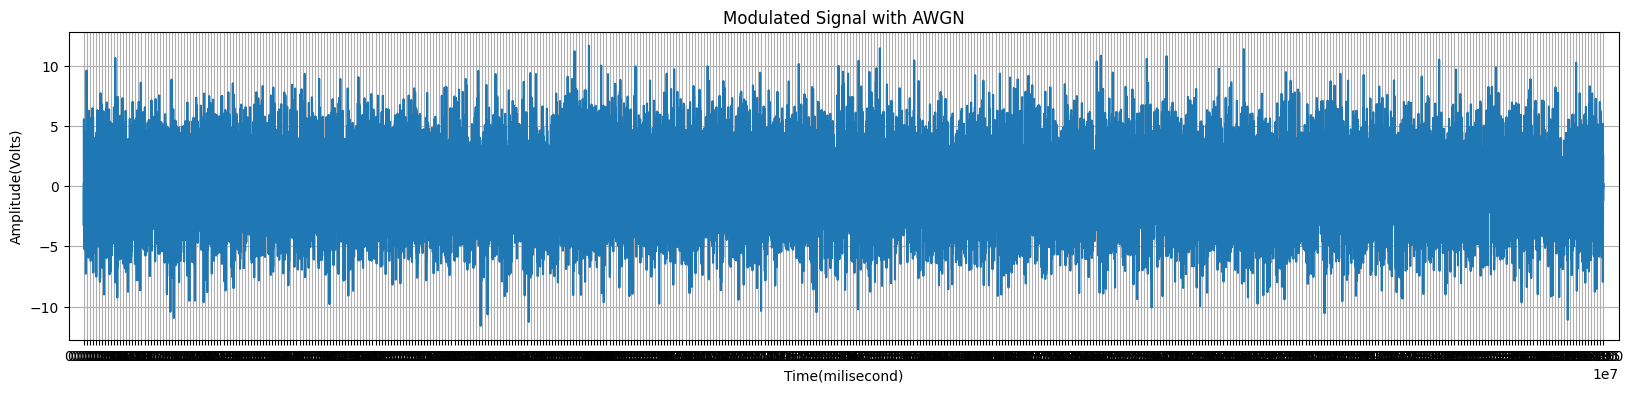

In [ ]:
# add Gaussian noise with zero mean and variance N0/2 to the transmitted waveform
N0 = 18
standard_deviation = np.sqrt(N0/2)
mod_noise = add_awgn(mod, standard_deviation)

# plot the modulated signal with AWGN
plt.figure(figsize=(20,4))
plt.plot(1000*t,mod_noise)
plt.xlabel('Time(milisecond)')
plt.ylabel('Amplitude(Volts)')
plt.xticks(1000*np.arange(0,Tb*n+Tb,Tb))
plt.grid(True)
plt.title('Modulated Signal with AWGN')
plt.margins(x=0.01, y=0.05)
plt.savefig("modulated_signal_AWGN_psk.png")
plt.show()

**PSK Demodulation with AWGN**

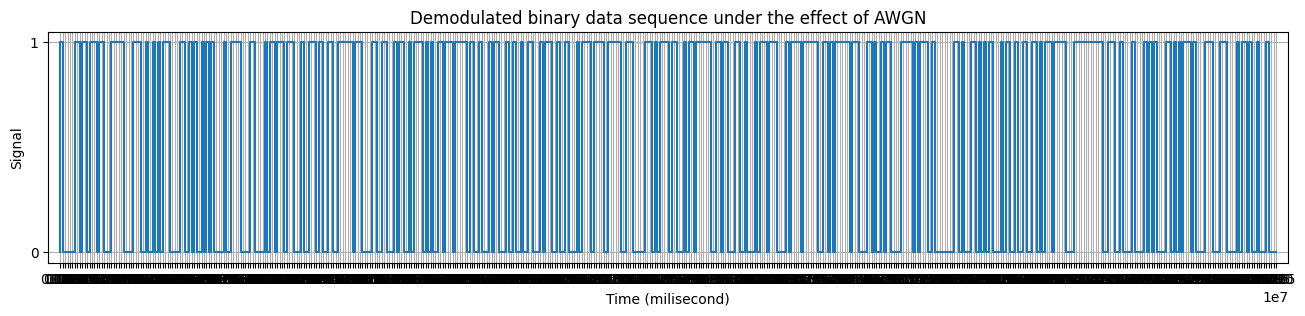

In [ ]:
# demodulate the signal with AWGN
demod_noise = demodulate(mod_noise)

# plot the demodulated binary data sequence under the effect of AWGN
plt.figure(figsize = (16, 3))
plt.title('Demodulated binary data sequence under the effect of AWGN')
plt.xticks(1000*np.arange(0,Tb*n,Tb))
plt.xlabel('Time (milisecond)')
plt.ylabel('Signal')
plt.yticks([0,1])
plt.step(1000*np.arange(0,Tb*n,Tb), demod_noise)
plt.grid(True)
plt.margins(x=0.01, y=0.05)
plt.savefig("demodulated_AWGN_psk.png")
plt.show()

**BER simulation for N0 = 18**

One symbol (carrier phase) represents one bit and hence symbol rate equals bit rate.

In [ ]:
Pb = np.count_nonzero(demod_noise - x) / len(x)
print("Số bit khác nhau: ",np.count_nonzero(demod_noise - x))
print("Độ dài chuỗi: ", len(x))
print(f"Bit Error Rate: {Pb*100}%")


Số bit khác nhau:  15
Độ dài chuỗi:  500
Bit Error Rate: 3.0%


#  Derive   the   bit   error   probability   of   a   Gaussian   channel

In [ ]:
E1 = np.trapz((c1**2)[0:nb],t[0:nb])   # energy per bit for binary value '0'
E2 = np.trapz((c2**2)[0:nb],t[0:nb])    # energy per bit for binary value '1'
Eb = 1/2 * (E1 + E2)
print(Eb)
print(f"Bit Error Probability in theory: {1/2 * erfc(np.sqrt(Eb / N0)) * 100}%")

24.030923329989033
Bit Error Probability in theory: 5.112471613776863%
